## Observations and Insights 

In [309]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.datasets as dta
#For correlation coefficient
import scipy.stats as st

#Do I want to activate the following:
#%matplotlib notebook

# Data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
#mouse_metadata
#study_results

# Combine the data into a single dataset
mousecombined_df = pd.merge(mouse_metadata, study_results, on= "Mouse ID",  how ="outer")

# Display the data table for preview
mousecombined_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [356]:
# Checking the number of mice.
    #number of unique records

print("There are", len(mousecombined_df), "records in the dataframe")
    
mousecombineduniquecount = len(mousecombined_df["Mouse ID"].unique())
print("There are", mousecombineduniquecount, "unique mouse IDs records in the dataframe")

There are 1893 records in the dataframe
There are 249 unique mouse IDs records in the dataframe


In [346]:
#determine if blank fields
mousecombined_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [347]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
    #https://thispointer.com/pandas-find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns-using-dataframe-duplicated-in-python/#:~:text=To%20find%20%26%20select%20the%20duplicate,argument%20is%20'first').
        #DataFrame.duplicated(subset=None, keep='first')
mouseduplicates = mousecombined_df[['Mouse ID', 'Timepoint']]
mouseduplicates = mouseduplicates[mouseduplicates.duplicated(['Mouse ID', 'Timepoint'])]
mouseduplicates

,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [348]:
# Optional: Get all the data for the duplicate mouse ID. 
mouseduplicatesfull = mousecombined_df[mousecombined_df.duplicated(['Mouse ID', 'Timepoint'])]
mouseduplicatesfull


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [353]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
    # First create a list of the indexes that are duplicates
duplicateindex = mouseduplicatesfull.index
duplicateindex


Int64Index([909, 911, 913, 915, 917], dtype='int64')

In [354]:
    #Drop the duplicate IDs
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
mouseclean = mousecombined_df.drop(mousecombined_df.index[[duplicateindex]])

mouseclean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [357]:
# Checking the number of mice in the clean DataFrame.
print("There are", len(mouseclean), "records in the dataframe")

#number of unique records
mousecombineduniquecount = len(mouseclean["Mouse ID"].unique())
print("There are", mousecombineduniquecount, "unique mouse IDs records in the dataframe")



There are 1888 records in the dataframe
There are 249 unique mouse IDs records in the dataframe


## Summary Statistics

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

In [358]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume
    #for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
mouseregimengroup = mouseclean.groupby(["Drug Regimen"])
regimensummary = mouseregimengroup["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
                   

Regimen_Tumor_Volume_Summary = regimensummary.rename(columns={
    "mean":"Mean Tumor Volume (mm3)",
    "median":"Median Tumor Volume (mm3)",
    "var":"Variance Tumor Volume (mm3)",
    "std":"Standard Deviation Tumor Volume (mm3)",
    "sem":"SEM Tumor Volume (mm3)"
})

Regimen_Tumor_Volume_Summary

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance Tumor Volume (mm3),Standard Deviation Tumor Volume (mm3),SEM Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of mice')

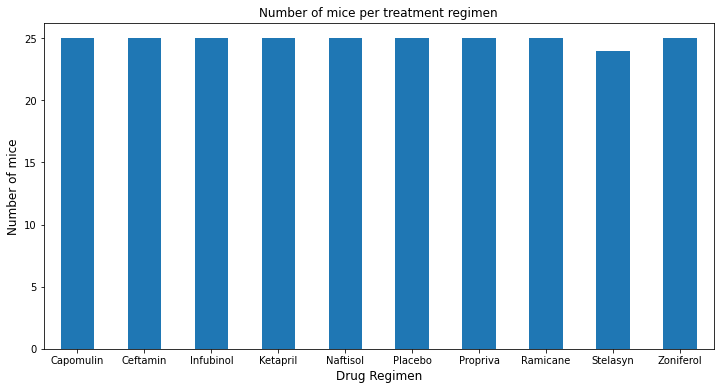

In [359]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study
    #using pandas. 
regimenmice = mouseregimengroup["Mouse ID"].nunique()
#print(regimenmice)

#Y axis = number of mice
regimenY = regimenmice.values.tolist()
#print(regimenY)

#X azis = regimen
regimenX = regimenmice.index.tolist()
#print(regimenX)

regimenmice.plot.bar(figsize=(12,6), width=.5, rot=0, title='Number of mice per treatment regimen')
plt.xlabel('Drug Regimen',fontdict={'fontsize':12})
plt.ylabel("Number of mice", fontdict={'fontsize':12})

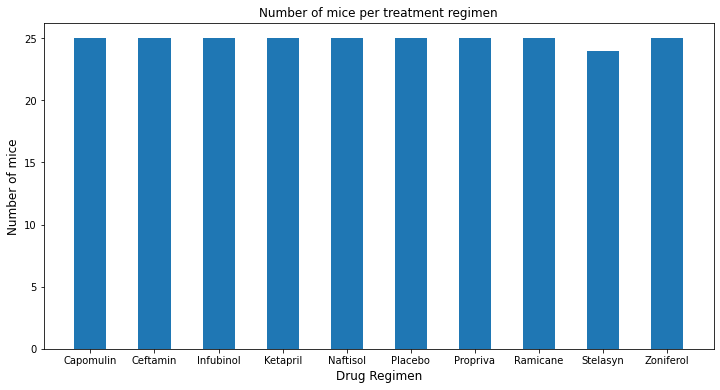

In [360]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study
    #using pyplot.

plt.figure(figsize=(12,6))
plt.bar(regimenX, regimenY, width=.5,)
plt.title('Number of mice per treatment regimen')
plt.xlabel('Drug Regimen',fontdict={'fontsize':12})
plt.ylabel('Number of mice', fontdict={'fontsize':12})

plt.show()

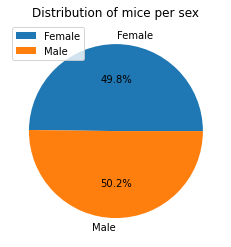

In [361]:
#Generate a pie plot using both Pandas plot
mousesexgroup = mouseclean.groupby(["Sex"])
mousesexcount = mousesexgroup["Mouse ID"].nunique()
labels = ["Female", "Male"]
#sexY = mousesexcount.values.tolist()
#print(sexY)

#x axis = number of mice
#sexX = mousesexcount.index.tolist()

mousesexcount.plot.pie(title='Distribution of mice per sex', autopct="%1.1f%%")
plt.ylabel('')
plt.legend(loc=2)

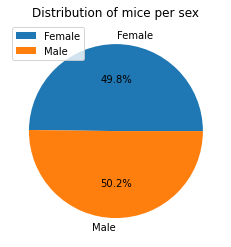

In [362]:

plt.pie(mousesexcount, autopct="%1.1f%%", labels=labels)
plt.title('Distribution of mice per sex')
#plt.ylabel('')
plt.legend(loc = 2)
plt.show()


## Quartiles, Outliers and Boxplots

In [363]:
#Good explanation of subplots. figires, axes
#http://jonathansoma.com/lede/algorithms-2017/classes/fuzziness-matplotlib/how-pandas-uses-matplotlib-plus-figures-axes-and-subplots/

In [366]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#https://www.youtube.com/watch?v=ojG35FU4G-Y

# Start by getting the last (greatest) timepoint for each mouse
lasttimepoint = mouseclean.groupby(["Mouse ID"]).last()
lasttimepoint

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,Infubinol,Female,20,23,45,67.973419,2
a251,Infubinol,Female,21,25,45,65.525743,1
a262,Placebo,Female,17,29,45,70.717621,4
a275,Ceftamin,Female,20,28,45,62.999356,3
a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...
z435,Propriva,Female,12,26,10,48.710661,0
z578,Ramicane,Male,11,16,45,30.638696,0
z581,Infubinol,Female,24,25,45,62.754451,3


In [367]:
    #isolate the four of the treatment regimens - # Capomulin, Ramicane, Infubinol, and Ceftamin
lastimetopfour = lasttimepoint.loc[(lasttimepoint["Drug Regimen"]=="Capomulin") | (lasttimepoint["Drug Regimen"]=="Ramicane") | (lasttimepoint["Drug Regimen"]=="Infubinol") | (lasttimepoint["Drug Regimen"]=="Ceftamin") ,:]
lastimetopfour

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#I don't know which "original dataframe" the mean

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,Infubinol,Female,20,23,45,67.973419,2
a251,Infubinol,Female,21,25,45,65.525743,1
a275,Ceftamin,Female,20,28,45,62.999356,3
a411,Ramicane,Male,3,22,45,38.407618,1
a444,Ramicane,Female,10,25,45,43.047543,0
...,...,...,...,...,...,...,...
y769,Ceftamin,Female,6,27,45,68.594745,4
y793,Capomulin,Male,17,17,45,31.896238,2
y865,Ceftamin,Male,23,26,45,64.729837,3


In [368]:
# Put treatments into a list for for loop (and later for plot labels)

topfourtreatmentslist = list(lastimetopfour['Drug Regimen'].unique())
topfourtreatmentslist



['Infubinol', 'Ceftamin', 'Ramicane', 'Capomulin']

In [369]:
# Create empty list to fill with tumor vol data (for plotting)
#tumorvoldataCapomulin = []
#tumorvoldataRamicane = []
#tumorvoldataInfubinol = []
#tumorvoldataCeftamin = []

#tumorvoldf =  pd.DataFrame({
    #"Frame": [],
    #"Price": [],
    #"Sales": []
 #  })

#mydict = {}
mylist = []
#myindex = []


In [370]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.

#https://stackoverflow.com/questions/46411031/create-subsets-in-a-loop-according-to-a-column-values-in-pandas-dataframe

        #sample
        #for level in lastimetopfour.c1.unique():
        #    df_s = df.loc[df.c1 == level].drop('c1', 1)
        #    print(level + ":\n", df_s)
    
for regimen in topfourtreatmentslist:
    regimenvolumedate = lastimetopfour.loc[lastimetopfour["Drug Regimen"] == regimen,"Tumor Volume (mm3)"]
    #print(regimen + ":\n", regimenvolumedate.values)
    
    #https://www.geeksforgeeks.org/python-ways-to-create-a-dictionary-of-lists/
            
    mouseid = regimenvolumedate.index.tolist()
    idvalues = regimenvolumedate.values.tolist()
    
    #print(mouseid)
    
    #mylist.append(regimenvolumedate)
  
    #mylist.append(mouseid)
    mylist.append(idvalues)
    
    
    #mydict[idindex] = [regimenvolumedate.values.tolist()]
    #mydict[regimen] = [regimenvolumedate]
    #print(mydict)
    
        #rows = []
        #for i in range(3):
            #rows.append([i, i + 1])
        #print(rows)
    
    
    
    
        #for id in regimenvolumedate["Mouse ID"]
         #   mylist.append[]
    
    mousequartile = regimenvolumedate.quantile([.25,.5,.75])
    #print(regimen + ":\n", mousequartile)
    
    mouselowerq = mousequartile[0.25]
    mouseupperq = mousequartile[0.75]
    mouseiqr = mouseupperq-mouselowerq
    mouselower_bound = mouselowerq - (1.5*mouseiqr)
    mouseupper_bound = mouseupperq + (1.5*mouseiqr)
    
    print(regimen)
    print(f" Lower quartile of final tumor volume is: {mouselowerq}")
    print(f" Upper quartile of final tumor volume is: {mouseupperq}")
    print(f" Interquartile range of final tumor volume is: {mouseiqr}")
    print(f" Median range of final tumor volume is: {mousequartile[.5]}")
    print(f" Values below {mouselower_bound} could be outliers.")
    print(f" Values above {mouseupper_bound} could be outliers.\n")
    
    
#upper_boundCapomulin = upperqCapomulin + (1.5*iqrCapomulin)
    
#print(f"Capomulin's values above {upper_boundCapomulin} could be outliers.")




Infubinol
 Lower quartile of final tumor volume is: 54.04860769
 Upper quartile of final tumor volume is: 65.52574285
 Interquartile range of final tumor volume is: 11.477135160000003
 Median range of final tumor volume is: 60.16518046
 Values below 36.83290494999999 could be outliers.
 Values above 82.74144559000001 could be outliers.

Ceftamin
 Lower quartile of final tumor volume is: 48.72207785
 Upper quartile of final tumor volume is: 64.29983003
 Interquartile range of final tumor volume is: 15.577752179999997
 Median range of final tumor volume is: 59.85195552
 Values below 25.355449580000002 could be outliers.
 Values above 87.66645829999999 could be outliers.

Ramicane
 Lower quartile of final tumor volume is: 31.56046955
 Upper quartile of final tumor volume is: 40.65900627
 Interquartile range of final tumor volume is: 9.098536719999998
 Median range of final tumor volume is: 36.56165229
 Values below 17.912664470000003 could be outliers.
 Values above 54.30681135 could be o

In [372]:
#created dataframe to confirm data looking correct
    #also used it further down to find lowerst value of Capomulin to select mouse ID

volumedataframe = pd.DataFrame(mylist)
volumedataframe = volumedataframe.transpose()
volumedataframe.columns = topfourtreatmentslist

volumedataframe

,Infubinol,Ceftamin,Ramicane,Capomulin
0,67.973419,62.999356,38.407618,38.982878
1,65.525743,45.000000,43.047543,38.939633
2,57.031862,56.057749,38.810366,30.485985
3,66.083066,55.742829,32.978522,37.074024
4,72.226731,48.722078,38.342008,40.159220
5,36.321346,47.784682,33.397653,47.685963
6,60.969711,61.849023,37.311236,37.311846
7,62.435404,68.923185,40.659006,38.125164
8,60.918767,67.748662,29.128472,38.753265
9,67.289621,57.918381,33.562402,41.483008


In [373]:
#I DO NOT NEED THIS ANYMORE*******

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

CapomulinSeries = lastimetopfour.loc[lastimetopfour["Drug Regimen"]=="Capomulin","Tumor Volume (mm3)"]
RamicaneSeries = lastimetopfour.loc[lastimetopfour["Drug Regimen"]=="Ramicane","Tumor Volume (mm3)"]
InfubinolSeries = lastimetopfour.loc[lastimetopfour["Drug Regimen"]=="Infubinol","Tumor Volume (mm3)"]
CeftaminSeries = lastimetopfour.loc[lastimetopfour["Drug Regimen"]=="Ceftamin","Tumor Volume (mm3)"]
    
Capomulin = pd.DataFrame(CapomulinSeries)
Ramicane = pd.DataFrame(RamicaneSeries)
Infubinol = pd.DataFrame(InfubinolSeries)  
Ceftamin = pd.DataFrame(CeftaminSeries)

#for regime in topfourtreatmentslist
#    for vol in lastimetopfour
#        if Drug Regimen

    # add subset 
        #I don't understand this

 


In [374]:
#I DO NOT NEED THIS ANYMORE*******
# Determine outliers using upper and lower bounds
    #calculate the quartiles
    
        #Capomulin
quartilesCapomulin = Capomulin['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerqCapomulin = quartilesCapomulin[0.25]
upperqCapomulin = quartilesCapomulin[0.75]
iqrCapomulin = upperqCapomulin-lowerqCapomulin



#print(f"Capomulin's lower quartile of final tumor volume is: {lowerqCapomulin}")
#print(f"Capomulin's upper quartile of final tumor volume is: {upperqCapomulin}")
#print(f"Capomulin's interquartile range of final tumor volume is: {iqrCapomulin}")
#print(f"Capomulin's median of final tumor volume is: {quartilesCapomulin[0.5]} ")
#print()

        #Ramicane
quartilesRamicane = Ramicane['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerqRamicane = quartilesRamicane[0.25]
upperqRamicane = quartilesRamicane[0.75]
iqrRamicane = upperqRamicane-lowerqRamicane

#print(f"Ramicane's lower quartile of final tumor volume is: {lowerqRamicane}")
#print(f"Ramicane's upper quartile of final tumor volume is: {upperqRamicane}")
#print(f"Ramicane's interquartile range of final tumor volume is: {iqrRamicane}")
#print(f"Ramicane's median of final tumor volume is: {quartilesRamicane[0.5]} ")
#print()

       #Infubinol
quartilesInfubinol = Infubinol['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerqInfubinol = quartilesInfubinol[0.25]
upperqInfubinol = quartilesInfubinol[0.75]
iqrInfubinol = upperqInfubinol-lowerqInfubinol

#print(f"Infubinol's lower quartile of final tumor volume is: {lowerqInfubinol}")
#print(f"Infubinol's upper quartile of final tumor volume is: {upperqInfubinol}")
#print(f"Infubinol's interquartile range of final tumor volume is: {iqrInfubinol}")
#print(f"Infubinol's median of final tumor volume is: {quartilesInfubinol[0.5]} ")
#print()

       #Ceftamin
quartilesCeftamin = Ceftamin['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerqCeftamin = quartilesCeftamin[0.25]
upperqCeftamin = quartilesCeftamin[0.75]
iqrCeftamin = upperqCeftamin-lowerqCeftamin

#print(f"Ceftamin's lower quartile of final tumor volume is: {lowerqCeftamin}")
#print(f"Ceftamin's upper quartile of final tumor volume is: {upperqCeftamin}")
#print(f"Ceftamin's interquartile range of final tumor volume is: {iqrCeftamin}")
#print(f"Ceftamin's median of final tumor volume is: {quartilesCeftamin[0.5]} ")
#print()


In [375]:
#I DO NOT NEED THIS ANYMORE*******

#Calculate upper and lower bound and therefore outliers
#lower_bound = lowerq - (1.5*iqr)
#upper_bound = upperq + (1.5*iqr)
#print(f"Values below {lower_bound} could be outliers.")
#print(f"Values above {upper_bound} could be outliers.")

    #Capomulin
lower_boundCapomulin = lowerqCapomulin - (1.5*iqrCapomulin)
upper_boundCapomulin = upperqCapomulin + (1.5*iqrCapomulin)
#print(f"Capomulin's values below {lower_boundCapomulin} could be outliers.")
#print(f"Capomulin's values above {upper_boundCapomulin} could be outliers.")
#print()

    #Ramicane
lower_boundRamicane = lowerqRamicane - (1.5*iqrRamicane)
upper_boundRamicane = upperqRamicane + (1.5*iqrRamicane)
#print(f"Ramicane's values below {lower_boundRamicane} could be outliers.")
#print(f"Ramicane's values above {upper_boundRamicane} could be outliers.")
#print()

    #Infubinol
lower_boundInfubinol = lowerqInfubinol - (1.5*iqrInfubinol)
upper_boundInfubinol = upperqInfubinol + (1.5*iqrInfubinol)
#print(f"Infubinol's values below {lower_boundInfubinol} could be outliers.")
#print(f"Infubinol's values above {upper_boundInfubinol} could be outliers.")
#print()

    #Ceftamin
lower_boundCeftamin = lowerqCeftamin - (1.5*iqrCeftamin)
upper_boundCeftamin = upperqCeftamin + (1.5*iqrCeftamin)
#print(f"Ceftamin's values below {lower_boundCeftamin} could be outliers.")
#print(f"Ceftamin's values above {upper_boundCeftamin} could be outliers.")
#print()

In [376]:
#I have not been asked to create a table - #I DO NOT NEED THIS ANYMORE*******

#provide table showing potential outliers - I think I was trying to do this but not required???
#outlier_occupancy = california_data.loc[(california_data['AveOccup'] < lower_bound) | (california_data['AveOccup'] > upper_bound)]
#outlier_occupancy

#lasttumorvolumeoutliers = lastimetopfour.loc[(lastimetopfour["Tumor Volume (mm3)"]< lower_boundCapomulin) | (lastimetopfour["Tumor Volume (mm3)"] > upper_boundCapomulin)]

#lasttumorvolumeCapomulin = lastimetopfour.loc[(lastimetopfour["Drug Regimen"] == "Capomulin")]
#lasttumorvolumeCapomulin


#https://realpython.com/pandas-dataframe/#filtering-data
#df[(df['py-score'] >= 80) & (df['js-score'] >= 80)]
lastimetopfourCapomulin = lastimetopfour[(lastimetopfour["Drug Regimen"] == "Capomulin") & ((lastimetopfour["Tumor Volume (mm3)"] < lower_boundCapomulin) | (lastimetopfour["Tumor Volume (mm3)"] > upper_boundCapomulin))]
#print(lastimetopfourCapomulin)

lastimetopfourRamicane = lastimetopfour[(lastimetopfour["Drug Regimen"] == "Ramicane") & ((lastimetopfour["Tumor Volume (mm3)"] < lower_boundRamicane) | (lastimetopfour["Tumor Volume (mm3)"] > upper_boundRamicane))]
#print(lastimetopfourRamicane)

lastimetopfourInfubinol = lastimetopfour[(lastimetopfour["Drug Regimen"] == "Infubinol") & ((lastimetopfour["Tumor Volume (mm3)"] < lower_boundInfubinol) | (lastimetopfour["Tumor Volume (mm3)"] > upper_boundInfubinol))]
#print(lastimetopfourInfubinol)

lastimetopfourCeftamin = lastimetopfour[(lastimetopfour["Drug Regimen"] == "Ceftamin") & ((lastimetopfour["Tumor Volume (mm3)"] < lower_boundCeftamin) | (lastimetopfour["Tumor Volume (mm3)"] > upper_boundCeftamin))]
#print(lastimetopfourCeftamin)


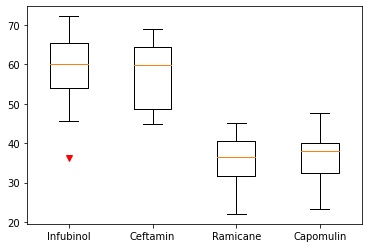

In [377]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#my_dict = {'ABC': [34.54, 34.345, 34.761], 'DEF': [34.541, 34.748, 34.482]}
#create boxplot


#df = pd.concat([CapomulinSeries, RamicaneSeries, InfubinolSeries, CeftaminSeries], axis=1)
#df.columns = [topfourtreatmentslist]
#ax = df.boxplot(grid=False, sym="rv")


##### MY X LABELS ARE IN THE WRONG ORDER



fig, ax = plt.subplots()
ax.boxplot(mylist, sym="rv")
ax.set_xticklabels(topfourtreatmentslist)
plt.show()

In [378]:
#I DO NOT NEED THIS ANYMORE*******
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#my_dict = {'ABC': [34.54, 34.345, 34.761], 'DEF': [34.541, 34.748, 34.482]}
#create boxplot


#df = pd.concat([CapomulinSeries, RamicaneSeries, InfubinolSeries, CeftaminSeries], axis=1)
#df.columns = [topfourtreatmentslist]
#ax = df.boxplot(grid=False, sym="rv")


##### MY X LABELS ARE IN THE WRONG ORDER



#fig, ax = plt.subplots() - i need to create subplots further up the order of things!!!!!!!!
#ax.boxplot(my_dict.values())
#ax.set_xticklabels(my_dict.keys())

## Line and Scatter Plots

In [379]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

    #Find the mouse with the smallest tumor at the last time point
    
print("The selected mouse for the line plot is " + lastimetopfour.loc[lastimetopfour["Drug Regimen"]=="Capomulin", "Tumor Volume (mm3)"].idxmin() )

The selected mouse for the line plot is s185


In [380]:
    #isolate S185 data
Capomulinmouse = mouseclean.loc[mouseclean["Mouse ID"]=="s185", :]
Capomulinmouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


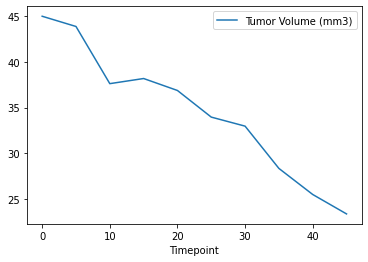

In [381]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

Capomulinmouse.plot(x="Timepoint", y="Tumor Volume (mm3)")
plt.show()

#make sure you add all the titles and labels

In [382]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
    #to get average tumor volume for each mouse in Capomulin
        #use mouseregimengroup
#test = mouseregimengroup.loc[mouseregimengroup["Drug Regimen"]=="Capomulin",:]
#Capomulinmouse = mouseclean.loc[mouseclean["Mouse ID"]=="s185", :]


CapomulinFullData = mouseclean.loc[mouseclean["Drug Regimen"]=="Capomulin",:]


#getting a series for tumor volume
mouseIDgroup = CapomulinFullData.groupby(["Mouse ID"])
mousetumoraverage = mouseIDgroup["Tumor Volume (mm3)"].mean()

#get a series of mouse weights
mousetumorweight = mouseIDgroup["Weight (g)"].unique()
#Needed to reconvert weight valules to strings
mousetumorweight = mousetumorweight.str[0]

mousetumorweight, mousetumoraverage


(Mouse ID
 b128    22
 b742    21
 f966    17
 g288    19
 g316    22
 i557    24
 i738    20
 j119    23
 j246    21
 l509    21
 l897    19
 m601    17
 m957    19
 r157    25
 r554    17
 r944    25
 s185    17
 s710    23
 t565    17
 u364    17
 v923    21
 w150    23
 w914    21
 x401    15
 y793    17
 Name: Weight (g), dtype: int64,
 Mouse ID
 b128    41.963636
 b742    40.083699
 f966    36.505973
 g288    41.990097
 g316    44.613344
 i557    44.805810
 i738    39.141053
 j119    44.465236
 j246    43.216925
 l509    44.434474
 l897    42.507261
 m601    34.847470
 m957    39.049816
 r157    45.798970
 r554    36.509212
 r944    43.367364
 s185    34.559143
 s710    42.803733
 t565    39.328725
 u364    39.887495
 v923    41.581595
 w150    41.384825
 w914    41.352452
 x401    36.182040
 y793    38.506829
 Name: Tumor Volume (mm3), dtype: float64)

In [383]:
#I think I need to join 2 series into a dataframe
#mouseweighttumordf = pd.merge(mousetumorweight, mousetumoraverage, right_index = True, 
#               left_index = True) 
#Needed to reconvert weight valules to strings
#mouseweighttumordf['Weight (g)'] = mouseweighttumordf['Weight (g)'].str[0]

#went back and sorted this dataframe to compare against scatter plotab
    #as it seems there was a plot missing but I have confirmed 2 plots are over each other 
#mouseweighttumordf.sort_values(["Weight (g)","Tumor Volume (mm3)"],ascending=(True,True))

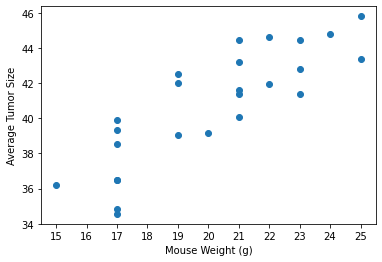

In [384]:
#Scatterplot
    #x-axis weight
    #y-axis tumor volume
  

xweight = np.arange(min(mousetumorweight), max(mousetumorweight)+1, 1)
#print(xweight)

plt.scatter(mousetumorweight, mousetumoraverage)
plt.xticks(xweight)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Size')
plt.show()

#make larger and dots transparent to you can see overlapping dots for with 17g

## Correlation and Regression

In [385]:
#correlation coefficient

mousecorrelation = st.pearsonr (mousetumorweight, mousetumoraverage)
print(mousecorrelation[0])

0.8419363424694717


In [386]:
#linear regression 

mouse_slope, mouse_int, mouse_r, mouse_p, mouse_std_err = st.linregress(mousetumorweight, mousetumoraverage)
mouse_slope, mouse_int, mouse_r, mouse_p, mouse_std_err


(0.9544396890241045,
 21.552160532685015,
 0.8419363424694718,
 1.3225722434712642e-07,
 0.1275435903320134)

In [387]:
    # Create equation of line to calculate predicted violent crime rate

#vc_fit = vc_slope * year + vc_int
    
mouse_fit = mouse_slope * xweight + mouse_int
mouse_fit

array([35.86875587, 36.82319556, 37.77763525, 38.73207494, 39.68651462,
       40.64095431, 41.595394  , 42.54983369, 43.50427338, 44.45871307,
       45.41315276])

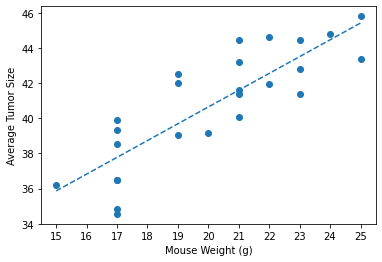

In [388]:

#year = crime_data.iloc[:,0]
xweight = np.arange(min(mousetumorweight), max(mousetumorweight)+1, 1)


#violent_crime_rate = crime_data.iloc[:,3]
mousetumoraverage


#plt.scatter(year,violent_crime_rate)
plt.scatter(mousetumorweight,mousetumoraverage)

#plt.plot(year,vc_fit,"--")
plt.plot(xweight, mouse_fit, "--")

#plt.xticks(year, rotation=90)
plt.xticks(xweight)

plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Size')
plt.show()